In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

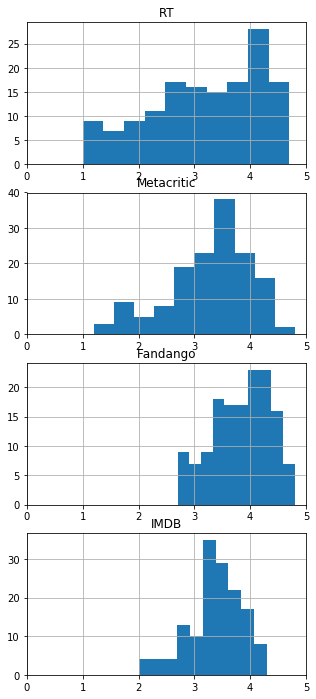

In [7]:
fig = plt.figure(figsize=(5,12))
ax = fig.add_subplot(4,1,1)
ax.set_xlim(0,5)
ax.set_title('RT')
movie_reviews['RT_user_norm'].hist(ax = ax)

ax = fig.add_subplot(4,1,2)
ax.set_xlim(0,5)
ax.set_title('Metacritic')
movie_reviews['Metacritic_user_nom'].hist(ax = ax)

ax = fig.add_subplot(4,1,3)
ax.set_xlim(0,5)
ax.set_title('Fandango')
movie_reviews['Fandango_Ratingvalue'].hist(ax = ax)

ax = fig.add_subplot(4,1,4)
ax.set_xlim(0,5)
ax.set_title('IMDB')
movie_reviews['IMDB_norm'].hist(ax = ax)

In [8]:
def calc_mean(series):
    return series.mean()

user_review_cols=['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue', 'IMDB_norm']

user_reviews = movie_reviews[user_review_cols]

user_reviews_mean = user_reviews.apply(calc_mean)

rt_mean = user_reviews_mean['RT_user_norm']
mc_mean = user_reviews_mean['Metacritic_user_nom']
fg_mean = user_reviews_mean['Fandango_Ratingvalue']
id_mean = user_reviews_mean['IMDB_norm']

user_reviews_mean.head(4)

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64

In [11]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    variance = 0
    mean_pts = series.mean()
    for pts in series:
        diff = pts - mean_pts
        variance += (diff ** 2)
    return variance / len(series)

def calc_std(series):
    return (calc_variance(series) ** (1/2))

def calc_var_std(series):
    var = calc_variance(series)
    return var, (var ** (1/2))

rt_var, rt_stdev = calc_var_std(movie_reviews['RT_user_norm'])
print(calc_var_std(movie_reviews['RT_user_norm']))
mc_var, mc_stdev = calc_var_std(movie_reviews['Metacritic_user_nom'])
print(calc_var_std(movie_reviews['Metacritic_user_nom']))
fg_var, fg_stdev = calc_var_std(movie_reviews['Fandango_Ratingvalue'])
print(calc_var_std(movie_reviews['Fandango_Ratingvalue']))
id_var, id_stdev = calc_var_std(movie_reviews['IMDB_norm'])
print(calc_var_std(movie_reviews['IMDB_norm']))


(0.99557843873146901, 0.99778677017260009)
(0.5666546256333268, 0.75276465487782218)
(0.25110714955901703, 0.50110592648562546)
(0.22821964721336099, 0.47772340032006072)


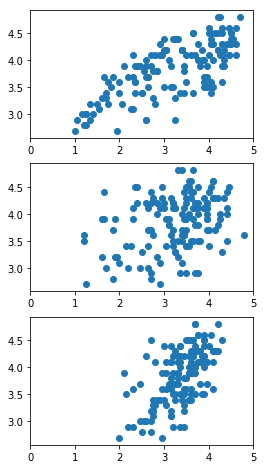

In [16]:
fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(3,1,1)
ax.set_xlim(0.0,5)
ax.scatter(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'])

ax = fig.add_subplot(3,1,2)
ax.set_xlim(0,5)
ax.scatter(movie_reviews['Metacritic_user_nom'],movie_reviews['Fandango_Ratingvalue'])

ax = fig.add_subplot(3,1,3)
ax.set_xlim(0,5)
ax.scatter(movie_reviews['IMDB_norm'], movie_reviews['Fandango_Ratingvalue'])


In [17]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_covariance(series1, series2):
    mean_col1 = series1.mean()
    
    mean_col2 = series2.mean()
    
    mul_cols = (series1 - mean_col1) * (series2- mean_col2)
    sum_cols = sum(mul_cols)

    return sum_cols/len(series1)

from numpy import cov
def calc_cov(series1, series2):
    return cov(series1, series2)[0,1]

rt_fg_covar = calc_covariance(movie_reviews['RT_user_norm'], movie_reviews['Fandango_Ratingvalue'])
print(rt_fg_covar)

mc_fg_covar = calc_covariance(movie_reviews['Metacritic_user_nom'], movie_reviews['Fandango_Ratingvalue'])
print(mc_fg_covar)

id_fg_covar = calc_covariance(movie_reviews['IMDB_norm'], movie_reviews['Fandango_Ratingvalue'])
print(id_fg_covar)


0.362162225558
0.127100769375
0.143718802777


In [18]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

def calc_correlation(series1, series2):
    cov = calc_covariance(series1, series2)
    std1 = calc_variance(series1) ** (1/2)
    std2 = calc_variance(series2) ** (1/2)
    return cov/(std1 * std2)


rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
print(rt_fg_corr)
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
print(mc_fg_corr)
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])
print(id_fg_corr)

0.724328994249
0.336945314265
0.600354177263
